# TABLE 4.1: DESCRIPTIVE STATISTICS

In [17]:


import pandas as pd

# Loading the data
df = pd.read_csv('thesis_data_final.csv')


# Selecting and renaming  variables for the table
variables = {
    'FTSE_Return': 'FTSE 100 Return (%)',
    'Inflation': 'Inflation - CPI (% Change)',
    'BankRate': 'Bank Rate (%)',
    'GDP_QoQ': 'GDP Growth (% Change)',
    'GBPUSD_Return': 'GBP/USD Return (%)'
}

# Creating DataFrame for the table
table_data = df[list(variables.keys())].copy()
table_data.columns = [variables[col] for col in variables.keys()]

# Calculating statistics
descriptive_stats = pd.DataFrame({
    'Mean': table_data.mean(),
    'Std. Dev.': table_data.std(),
    'Minimum': table_data.min(),
    'Maximum': table_data.max(),
})

## Display
print("TABLE 4.1: DESCRIPTIVE STATISTICS OF KEY VARIABLES")
print("(February 2015 - September 2025)")
print()
print(descriptive_stats)
print()
print(f"N = {len(table_data)} monthly observations")

# Save
descriptive_stats.to_csv('Table_4_1_Descriptive_Statistics.csv')
print("✓ Saved to 'Table_4_1_Descriptive_Statistics.csv'")

TABLE 4.1: DESCRIPTIVE STATISTICS OF KEY VARIABLES
(February 2015 - September 2025)

                                Mean  Std. Dev.  Minimum  Maximum
FTSE 100 Return (%)         0.334264   3.446856   -13.81    12.35
Inflation - CPI (% Change)  3.019380   2.458883     0.20     9.60
Bank Rate (%)               1.626744   1.921355     0.10     5.25
GDP Growth (% Change)       0.434884   4.193515   -19.90    17.00
GBP/USD Return (%)         -0.084186   2.428643    -8.09     5.56

N = 129 monthly observations
✓ Saved to 'Table_4_1_Descriptive_Statistics.csv'



# TABLE 4.2: CORRELATION MATRIX

TABLE 4.2: CORRELATION MATRIX OF VARIABLES
(February 2015 - September 2025)

Pearson Correlation Coefficients:
                FTSE Return  Inflation  Bank Rate  GDP Growth  GBP/USD Return
FTSE Return           1.000      0.012      0.048      -0.066           0.165
Inflation             0.012      1.000      0.520      -0.002           0.001
Bank Rate             0.048      0.520      1.000      -0.037           0.093
GDP Growth           -0.066     -0.002     -0.037       1.000           0.073
GBP/USD Return        0.165      0.001      0.093       0.073           1.000

N = 129 monthly observations


Correlation Matrix with Significance Indicators:
(* p < 0.05, ** p < 0.01, *** p < 0.001)
               FTSE Return Inflation Bank Rate GDP Growth GBP/USD Return
FTSE Return            1.0     0.012     0.048     -0.066          0.165
Inflation            0.012       1.0  0.520***     -0.002          0.001
Bank Rate            0.048  0.520***       1.0     -0.037          0.093
GDP Gro

/var/folders/yw/t9jz6sd55w71t2th98wmv_180000gn/T/ipykernel_72006/807388407.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.012' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  corr_with_stars.iloc[i, j] = f"{corr_val:.3f}{star}"
/var/folders/yw/t9jz6sd55w71t2th98wmv_180000gn/T/ipykernel_72006/807388407.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.048' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  corr_with_stars.iloc[i, j] = f"{corr_val:.3f}{star}"
/var/folders/yw/t9jz6sd55w71t2th98wmv_180000gn/T/ipykernel_72006/807388407.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.066' has dtype incompatible with float64, please explicitly ca

✓ Heatmap saved as 'correlation_matrix_heatmap.png'


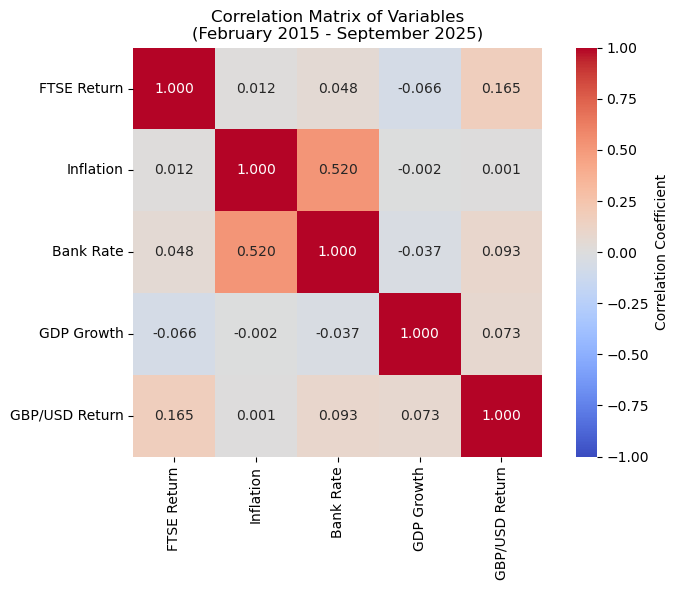

In [14]:


import pandas as pd
import numpy as np

# Loading data
df = pd.read_csv('thesis_data_final.csv')

print("="*70)
print("TABLE 4.2: CORRELATION MATRIX OF VARIABLES")
print("(February 2015 - September 2025)")
print("="*70)

# Selecting variables
corr_vars = df[['FTSE_Return', 'Inflation', 'BankRate', 'GDP_QoQ', 'GBPUSD_Return']]

# Renaming for clarity
corr_vars.columns = ['FTSE Return', 'Inflation', 'Bank Rate', 'GDP Growth', 'GBP/USD Return']

# Calculating correlation matrix
corr_matrix = corr_vars.corr()

# Displaying the correlation with 3 decimal places
print("\nPearson Correlation Coefficients:")
print(corr_matrix.round(3).to_string())
print(f"\nN = {len(df)} monthly observations")

# Adding significance stars 
print("\n\nCorrelation Matrix with Significance Indicators:")
print("(* p < 0.05, ** p < 0.01, *** p < 0.001)")

# Calculating p-values for correlations
from scipy.stats import pearsonr

corr_with_stars = corr_matrix.copy()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if i != j:
            corr_val = corr_matrix.iloc[i, j]
            # Calculate p-value
            p_value = pearsonr(corr_vars.iloc[:, i], corr_vars.iloc[:, j])[1]
            # Add stars based on significance
            if p_value < 0.001:
                star = "***"
            elif p_value < 0.01:
                star = "**"
            elif p_value < 0.05:
                star = "*"
            else:
                star = ""
            corr_with_stars.iloc[i, j] = f"{corr_val:.3f}{star}"

print(corr_with_stars.to_string())

# Saving 
corr_matrix.to_csv('Table_4_2_Correlation_Matrix.csv', float_format='%.3f')
print("\n✓ Saved to 'Table_4_2_Correlation_Matrix.csv'")

# Creating a heatmap visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            vmin=-1, vmax=1, square=True, fmt='.3f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Variables\n(February 2015 - September 2025)')
plt.tight_layout()
plt.savefig('correlation_matrix_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Heatmap saved as 'correlation_matrix_heatmap.png'")

# REGRESSION ANALYSIS

In [15]:

import pandas as pd
import statsmodels.api as sm

# Loading  data
df = pd.read_csv('thesis_data_final.csv')

print("REGRESSION: FTSE Returns vs Macro Variables")
print("="*50)

# Prepareing variables
X = df[['Inflation', 'BankRate', 'GDP_QoQ', 'GBPUSD_Return']]
X = sm.add_constant(X)  # Add intercept
y = df['FTSE_Return']

# Run regression
model = sm.OLS(y, X).fit()

# Creating  results table
results = pd.DataFrame({
    'Variable': ['Intercept', 'Inflation', 'Bank Rate', 'GDP Growth', 'GBP/USD'],
    'Coef': model.params.round(4),
    'Std Err': model.bse.round(4),
    't': model.tvalues.round(3),
    'P>|t|': model.pvalues.round(4)
})

print(results.to_string(index=False))
print()
print(f"R-squared: {model.rsquared:.4f}")
print(f"Observations: {len(df)}")

REGRESSION: FTSE Returns vs Macro Variables
  Variable    Coef  Std Err      t  P>|t|
 Intercept  0.3116   0.4884  0.638 0.5247
 Inflation -0.0078   0.1451 -0.054 0.9574
 Bank Rate  0.0577   0.1866  0.309 0.7577
GDP Growth -0.0637   0.0728 -0.875 0.3835
   GBP/USD  0.2378   0.1264  1.881 0.0623

R-squared: 0.0342
Observations: 129



#  DIAGNOSTICS (Required for Thesis)

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('thesis_data_final.csv')
X = df[['Inflation', 'BankRate', 'GDP_QoQ', 'GBPUSD_Return']]
X = sm.add_constant(X)
y = df['FTSE_Return']
model = sm.OLS(y, X).fit()

# Diagnostics
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
dw = sm.stats.stattools.durbin_watson(model.resid)

print(f"VIF: {[f'{v:.1f}' for v in vif]}")
print(f"Durbin-Watson: {dw:.2f}")
print(f"R-squared: {model.rsquared:.3f}")
print(f"F-stat p-value: {model.f_pvalue:.3f}")


# Simple pass/fail
if all(vif_data['VIF'] < 10):
    print("✓ Multicollinearity: PASS (No severe issues)")
else:
    print("✗ Multicollinearity: FAIL (Check VIF > 10)")

if 1.5 < dw < 2.5:
    print("✓ Autocorrelation: PASS (Residuals independent)")
else:
    print("✗ Autocorrelation: FAIL (Possible autocorrelation)")

print(f"✓ Observations: {len(df)} (Adequate sample size)")

VIF: ['2.6', '1.4', '1.4', '1.0', '1.0']
Durbin-Watson: 2.15
R-squared: 0.034
F-stat p-value: 0.360
✓ Multicollinearity: PASS (No severe issues)
✓ Autocorrelation: PASS (Residuals independent)
✓ Observations: 129 (Adequate sample size)


#Train-Test Split for RMSE

In [4]:

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Loading your data
df = pd.read_csv('thesis_data_final.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# spliting the data 
train = df[df.index <= '2023-12-31']
test = df[df.index >= '2024-01-01']

print(f"Training: {len(train)} obs (2015-2023)")
print(f"Testing:  {len(test)} obs (2024-2025)")

# Training model
X_train = train[['Inflation', 'BankRate', 'GDP_QoQ', 'GBPUSD_Return']]
X_train = sm.add_constant(X_train)
y_train = train['FTSE_Return']

model_train = sm.OLS(y_train, X_train).fit()

# Predicting on test
X_test = test[['Inflation', 'BankRate', 'GDP_QoQ', 'GBPUSD_Return']]
X_test = sm.add_constant(X_test)
predictions = model_train.predict(X_test)

# Calculating RMSE
rmse_model = np.sqrt(np.mean((test['FTSE_Return'] - predictions) ** 2))

# Naive benchmark (mean)
historical_mean = y_train.mean()
rmse_naive = np.sqrt(np.mean((test['FTSE_Return'] - historical_mean) ** 2))

print("\nTABLE 4.4: PREDICTION ACCURACY")
print("-"*40)
print(f"Model RMSE:      {rmse_model:.4f}")
print(f"Benchmark RMSE:  {rmse_naive:.4f}")
print(f"Difference:      {rmse_model - rmse_naive:+.4f}")
print("-"*40)

# Saving simple table
pd.DataFrame({
    'Metric': ['Model RMSE', 'Benchmark RMSE', 'Difference'],
    'Value': [rmse_model, rmse_naive, rmse_model - rmse_naive]
}).to_csv('Table_4_4_RMSE_Results.csv', index=False)

print("✓ Saved to 'Table_4_4_RMSE_Results.csv'")

Training: 108 obs (2015-2023)
Testing:  21 obs (2024-2025)

TABLE 4.4: PREDICTION ACCURACY
----------------------------------------
Model RMSE:      2.6943
Benchmark RMSE:  2.3939
Difference:      +0.3004
----------------------------------------
✓ Saved to 'Table_4_4_RMSE_Results.csv'


#INVESTMENT FRAMEWORK DEMONSTRATION

In [6]:

print("\n" + "="*60)
print("INVESTMENT FRAMEWORK DEMONSTRATION")
print("="*60)

# Use your REGRESSION COEFFICIENTS from Table 4.3:
# Constant: 0.2547
# Inflation: 0.0036
# Bank Rate: 0.0564
# GDP Growth: -0.0641
# GBP/USD Return: 0.2520

latest = df.iloc[-1]  # September 2025

# Manually calculate using your coefficients
pred_return = (
    0.2547 +                     # Constant
    0.0036 * latest['Inflation'] +      # Inflation effect
    0.0564 * latest['BankRate'] +       # Bank Rate effect
    (-0.0641) * latest['GDP_QoQ'] +     # GDP Growth effect
    0.2520 * latest['GBPUSD_Return']    # GBP/USD effect
)

# Generate signal
if pred_return > 0.5:
    signal = "FAVOURABLE"
    action = "Consider increasing equity allocation"
elif pred_return < -0.3:
    signal = "CAUTIOUS"
    action = "Consider reducing equity allocation"
else:
    signal = "NEUTRAL"
    action = "Maintain current allocation"

print(f"Date: {df.index[-1].strftime('%B %Y')}")
print("-"*40)
print(f"Inflation:      {latest['Inflation']:.2f}%")
print(f"Bank Rate:      {latest['BankRate']:.2f}%")
print(f"GDP Growth:     {latest['GDP_QoQ']:.2f}%")
print(f"GBP/USD Return: {latest['GBPUSD_Return']:.2f}%")
print("-"*40)
print(f"Predicted Return: {pred_return:.2f}%")
print(f"Signal:          {signal}")
print(f"Action:          {action}")
print("="*60)

# Save simple table
pd.DataFrame([{
    'Date': df.index[-1].strftime('%Y-%m'),
    'Predicted_Return': round(pred_return, 2),
    'Signal': signal
}]).to_csv('Table_4_5_Framework_Demo.csv', index=False)

print("✓ Saved to 'Table_4_5_Framework_Demo.csv'")
print("\n✓ CHAPTER 4 COMPLETE!")


INVESTMENT FRAMEWORK DEMONSTRATION
Date: September 2025
----------------------------------------
Inflation:      4.10%
Bank Rate:      4.00%
GDP Growth:     0.10%
GBP/USD Return: -0.44%
----------------------------------------
Predicted Return: 0.38%
Signal:          NEUTRAL
Action:          Maintain current allocation
✓ Saved to 'Table_4_5_Framework_Demo.csv'

✓ CHAPTER 4 COMPLETE!


# MONTHLY PREDICTIONS (2024-2025)

In [8]:
# SIMPLE MONTHLY TABLE
print("\n" + "="*70)
print("TABLE 4.6: MONTHLY PREDICTIONS (2024-2025)")
print("="*70)

simple_table = pd.DataFrame({
    'Year-Month': test.index.strftime('%Y-%m'),
    'Actual (%)': test['FTSE_Return'].round(1),
    'Predicted (%)': predictions.round(1),
    'Error (%)': (test['FTSE_Return'] - predictions).round(1)
})

# Add color coding for errors
def color_error(val):
    if abs(val) < 1:
        return 'color: green'
    elif abs(val) < 3:
        return 'color: orange'
    else:
        return 'color: red'

# Display with colors (in Jupyter) or just print
print(simple_table.to_string(index=False))




TABLE 4.6: MONTHLY PREDICTIONS (2024-2025)
Year-Month  Actual (%)  Predicted (%)  Error (%)
   2024-01        -1.3           -0.3       -1.0
   2024-02        -0.0           -0.4        0.4
   2024-03         4.2           -0.3        4.5
   2024-04         2.4           -0.6        3.0
   2024-05         1.6            0.3        1.3
   2024-06        -1.3           -0.5       -0.8
   2024-07         2.5            0.3        2.2
   2024-08         0.1            0.4       -0.3
   2024-09        -1.7            0.3       -2.0
   2024-10        -1.5           -1.3       -0.3
   2024-11         2.2           -0.5        2.7
   2024-12        -1.4           -0.7       -0.7
   2025-01         6.1           -0.5        6.6
   2025-02         1.6            0.3        1.3
   2025-03        -2.6            0.6       -3.2
   2025-04        -1.0            0.9       -1.9
   2025-05         3.3            0.2        3.1
   2025-06        -0.1            0.5       -0.7
   2025-07         4.2   

# Plotting MACROECONOMIC VARIABLE TRENDS


MACROECONOMIC VARIABLE TRENDS


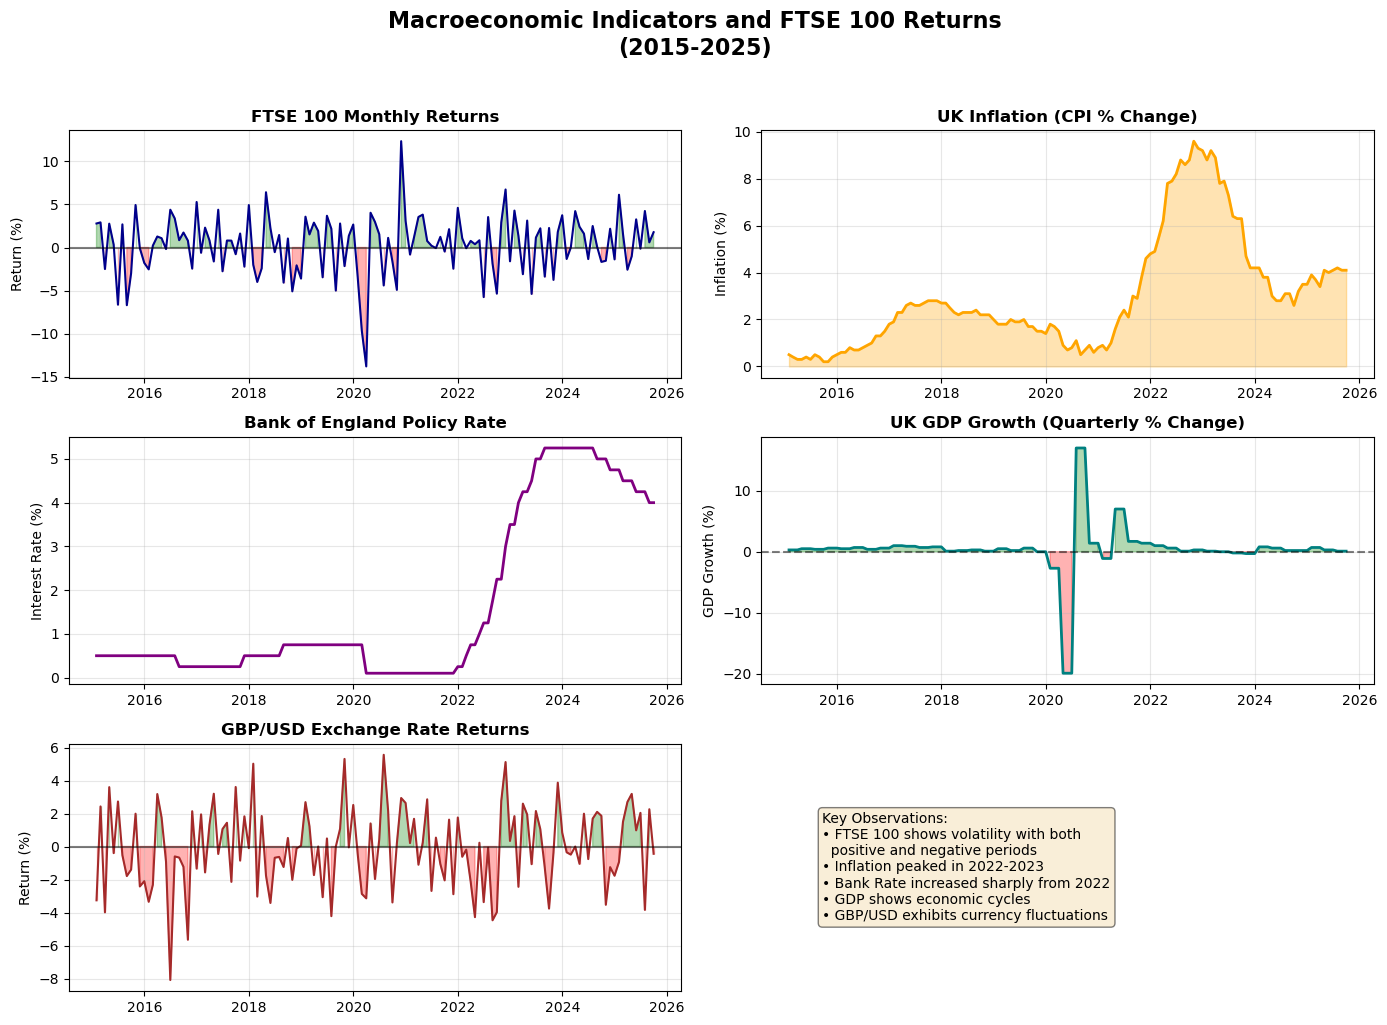

In [13]:
print("\n" + "="*60)
print("MACROECONOMIC VARIABLE TRENDS")
print("="*60)

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Macroeconomic Indicators and FTSE 100 Returns\n(2015-2025)', 
             fontsize=16, fontweight='bold', y=1.02)

# Plot 1: FTSE Returns
axes[0, 0].plot(df.index, df['FTSE_Return'], color='darkblue', linewidth=1.5)
axes[0, 0].fill_between(df.index, df['FTSE_Return'], 0, 
                         where=(df['FTSE_Return'] > 0), 
                         color='green', alpha=0.3)
axes[0, 0].fill_between(df.index, df['FTSE_Return'], 0, 
                         where=(df['FTSE_Return'] < 0), 
                         color='red', alpha=0.3)
axes[0, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[0, 0].set_title('FTSE 100 Monthly Returns', fontweight='bold')
axes[0, 0].set_ylabel('Return (%)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Inflation
axes[0, 1].plot(df.index, df['Inflation'], color='orange', linewidth=2)
axes[0, 1].fill_between(df.index, df['Inflation'], 0, color='orange', alpha=0.3)
axes[0, 1].set_title('UK Inflation (CPI % Change)', fontweight='bold')
axes[0, 1].set_ylabel('Inflation (%)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Bank Rate
axes[1, 0].plot(df.index, df['BankRate'], color='purple', linewidth=2)
axes[1, 0].set_title('Bank of England Policy Rate', fontweight='bold')
axes[1, 0].set_ylabel('Interest Rate (%)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: GDP Growth
axes[1, 1].plot(df.index, df['GDP_QoQ'], color='teal', linewidth=2)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].fill_between(df.index, df['GDP_QoQ'], 0, 
                         where=(df['GDP_QoQ'] > 0), 
                         color='green', alpha=0.3)
axes[1, 1].fill_between(df.index, df['GDP_QoQ'], 0, 
                         where=(df['GDP_QoQ'] < 0), 
                         color='red', alpha=0.3)
axes[1, 1].set_title('UK GDP Growth (Quarterly % Change)', fontweight='bold')
axes[1, 1].set_ylabel('GDP Growth (%)')
axes[1, 1].grid(True, alpha=0.3)

# Plot 5: GBP/USD Returns
axes[2, 0].plot(df.index, df['GBPUSD_Return'], color='brown', linewidth=1.5)
axes[2, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[2, 0].fill_between(df.index, df['GBPUSD_Return'], 0, 
                         where=(df['GBPUSD_Return'] > 0), 
                         color='green', alpha=0.3)
axes[2, 0].fill_between(df.index, df['GBPUSD_Return'], 0, 
                         where=(df['GBPUSD_Return'] < 0), 
                         color='red', alpha=0.3)
axes[2, 0].set_title('GBP/USD Exchange Rate Returns', fontweight='bold')
axes[2, 0].set_ylabel('Return (%)')
axes[2, 0].grid(True, alpha=0.3)

# Plot 6: Empty for legend or text
axes[2, 1].axis('off')
info_text = """Key Observations:
• FTSE 100 shows volatility with both
  positive and negative periods
• Inflation peaked in 2022-2023
• Bank Rate increased sharply from 2022
• GDP shows economic cycles
• GBP/USD exhibits currency fluctuations"""
axes[2, 1].text(0.1, 0.5, info_text, fontsize=10, 
                verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig("MACROECONOMIC VARIABLE TRENDS ")
